# Testing Hypotheses

In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

## U.S. Supreme Court, 1965: Swain vs. Alabama 

In [2]:
eligible_population = [0.26, 0.74]
sample_proportions(100, eligible_population)


array([0.24, 0.76])

In [3]:
# count of black men in a simulated panel

(100 * sample_proportions(100, eligible_population)).item(0)


20.0

In [4]:
def one_simulated_count():
    return (100 * sample_proportions(100, eligible_population)).item(0)


In [5]:
counts = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())


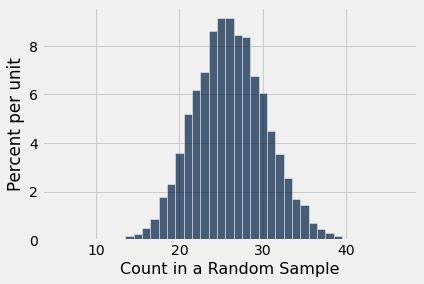

In [6]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))


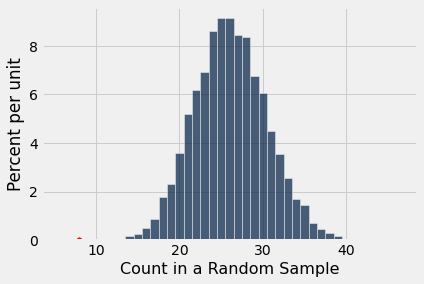

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
)

plt.scatter(8, 0, color='red', s=30)

## Mendel's Pea Flowers

In [8]:
def distance_from_75(p):
    return abs(100*p - 75)


In [9]:
model_proportions = [0.75, 0.25]


In [10]:
proportion_purple_in_sample = sample_proportions(929, model_proportions).item(0)
distance_from_75(proportion_purple_in_sample)


0.6727664155005328

In [11]:
def one_simulated_distance():
    proportion_purple_in_sample = sample_proportions(929, model_proportions).item(0)
    return distance_from_75(proportion_purple_in_sample)


In [12]:
distances = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())


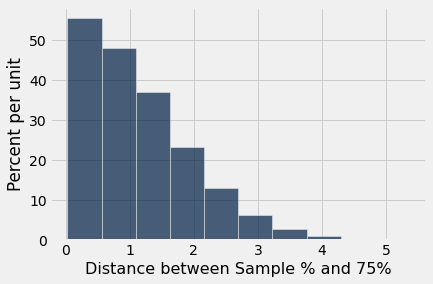

In [13]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()


In [14]:
#Comparing the Prediction and the Data
705 / 929


0.7588805166846071

In [15]:
observed_statistic = distance_from_75(705/929)
observed_statistic


0.8880516684607045

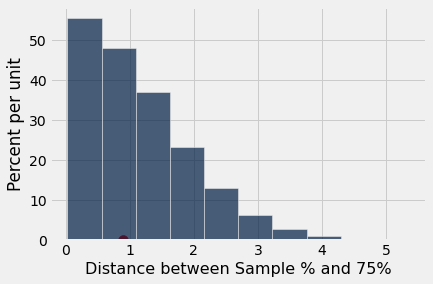

In [16]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plt.scatter(observed_statistic, 0, color='red', s=100);


## Multiple Categories

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


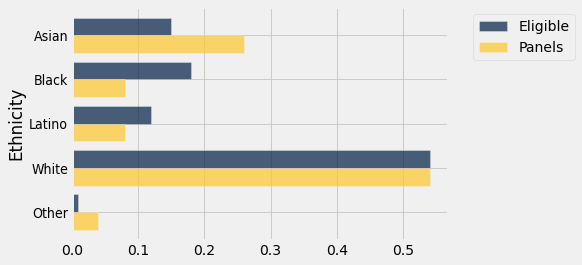

In [3]:
jury.barh('Ethnicity')

In [4]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.137646
Black,0.18,0.08,0.181005
Latino,0.12,0.08,0.116311
White,0.54,0.54,0.551273
Other,0.01,0.04,0.0137646


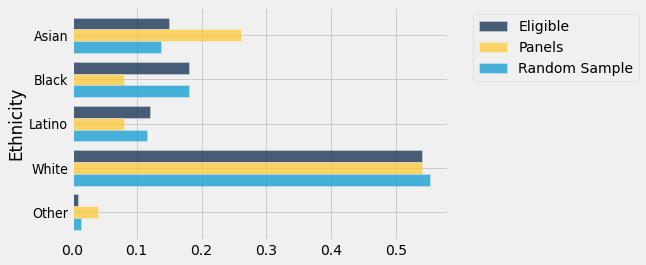

In [5]:
panels_and_sample.barh('Ethnicity')

In [6]:
jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [7]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [8]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14

In [9]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [10]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14

In [11]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.010536820371644842

In [12]:
def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   

In [17]:
tvds = make_array()

repetitions = 100000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

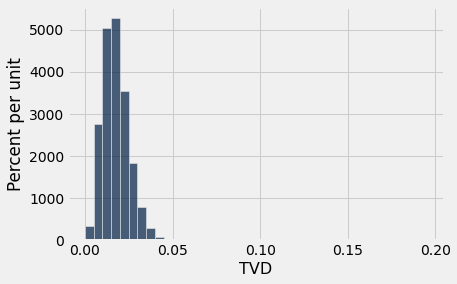

In [18]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))